# Plotting with Pandas

### Objectives

1. Plot directly with a DataFrame or Series object with the **`plot`** method


# Plotting in Pandas
Pandas makes plotting quite easy by automating much of the procedure for you. 

For plots to be embedded in the notebook, you must run the magic command **`%matplotlib inline`**

## Choosing other types of plots
Pandas directly uses Matplotlib for all of its plotting. Here are all the available types of plots in pandas

* **line** : line plot (default)
* **bar** : vertical bar plot
* **barh** : horizontal bar plot
* **hist** : histogram
* **box** : boxplot
* **kde** : Kernel Density Estimation plot (**density** is an alias)
* **area** : area plot
* **pie** : pie plot

## Additional Plotting Arguments
To modify your plots to your liking, matplotlib gives you lots of power. The most commonly used arguments are listed below but thre are [lots more](http://matplotlib.org/api/pyplot_api.html)

* **`linestyle`** (ls) - Pass a string of one of the following ['--', '-.', '-', ':']
* **`color`** (c) - Can take a string of a named color, a string of the hexadecimal characters or a rgb tuple with each number between 0 and 1. [Check out this really good stackoverflow post to see the colors](http://stackoverflow.com/questions/22408237/named-colors-in-matplotlib)
* **`linewidth`** (lw) - controls thickness of line. Default is 1
* **`alpha`** - controls opacity with a number between 0 and 1
* **`figsize`** - a tuple used to control the size of the plot. (width, height) 
* **`legend`** - boolean to control legend

## How Pandas Plots
* Pandas does well with aggregated data - but not tidy data
* Pandas uses the index as a label for the x-axis
* Pandas uses column names as labels in the legend
* Pandas assumes that each column contains homgeneous data
* Use the **`plot`** method and chose the **`kind`** of plot with a string

### Cryptocurrency Data

In [11]:
import pandas as pd
%matplotlib inline
pd.options.display.max_columns = 50

In [12]:
cc = pd.read_csv('data/crypto-markets.csv', parse_dates=['date'], index_col='date')
cc.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


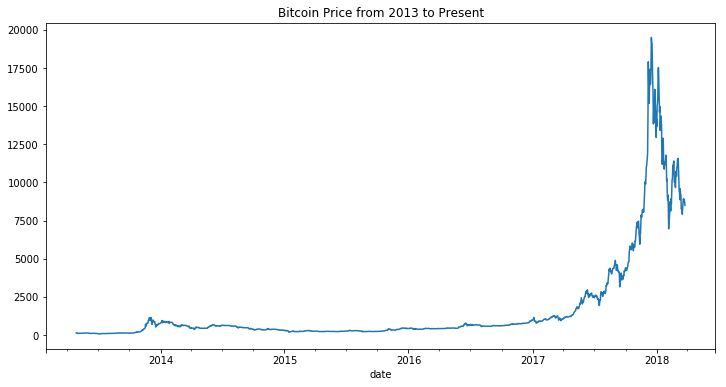

In [13]:
bitcoin = cc[cc['slug'] == 'bitcoin']
close = bitcoin['close']
close.plot(title='Bitcoin Price from 2013 to Present', figsize=(12,6))

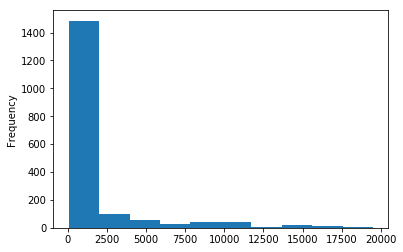

In [14]:
close.plot(kind='hist')

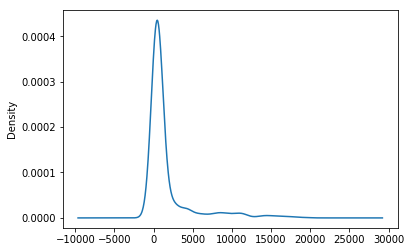

In [15]:
close.plot(kind='kde')

## Find the 5 largest current cryptocurrencies

In [16]:
cc.index[-1]

Timestamp('2018-03-10 00:00:00')

In [17]:
last_day = cc['2018-03-10'].sort_values('market', ascending=False)

In [18]:
last_day['slug'].values[:5]

array(['bitcoin', 'ethereum', 'ripple', 'bitcoin-cash', 'litecoin'],
      dtype=object)

In [19]:
top_5 = ['bitcoin', 'ethereum', 'ripple', 'bitcoin-cash', 'litecoin']
df_top5 = cc[cc['slug'].isin(top_5)]

In [20]:
df_top5.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [21]:
df_pivot = df_top5.pivot(columns='slug', values='market')

/Users/jasvirdhillon/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


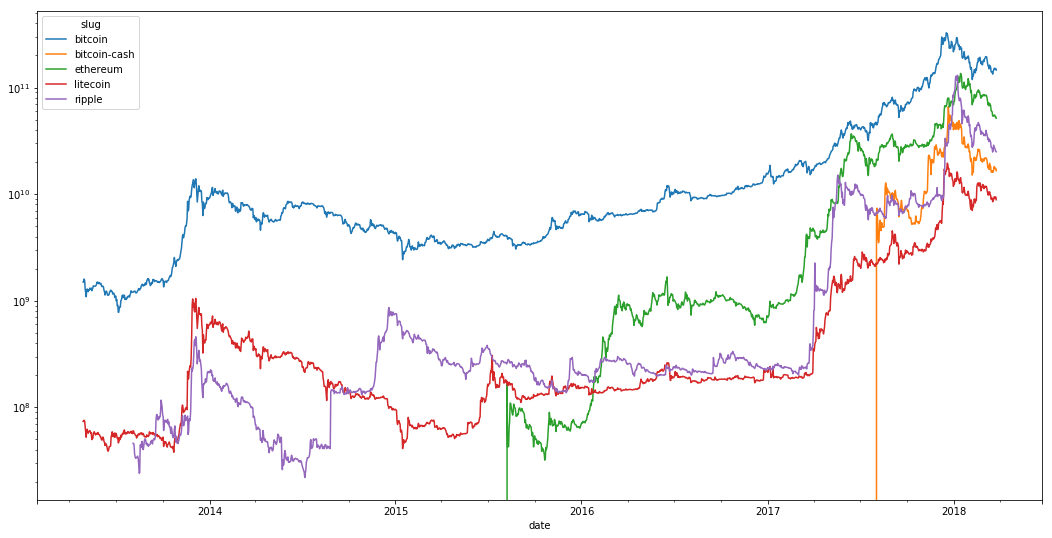

In [23]:
df_pivot.plot(logy=True, figsize=(18,9))

# Build an Area Plot for Emerging Coins

In [24]:
market_share = df_pivot.div(df_pivot.sum(axis='columns'), axis='index')
market_share.head()

slug,bitcoin,bitcoin-cash,ethereum,litecoin,ripple
date,,,,,
2013-04-28,0.953139,NaN,NaN,0.046861,NaN
2013-04-29,0.952141,NaN,NaN,0.047859,NaN
2013-04-30,0.954750,NaN,NaN,0.045250,NaN
2013-05-01,0.954289,NaN,NaN,0.045711,NaN
2013-05-02,0.951937,NaN,NaN,0.048063,NaN


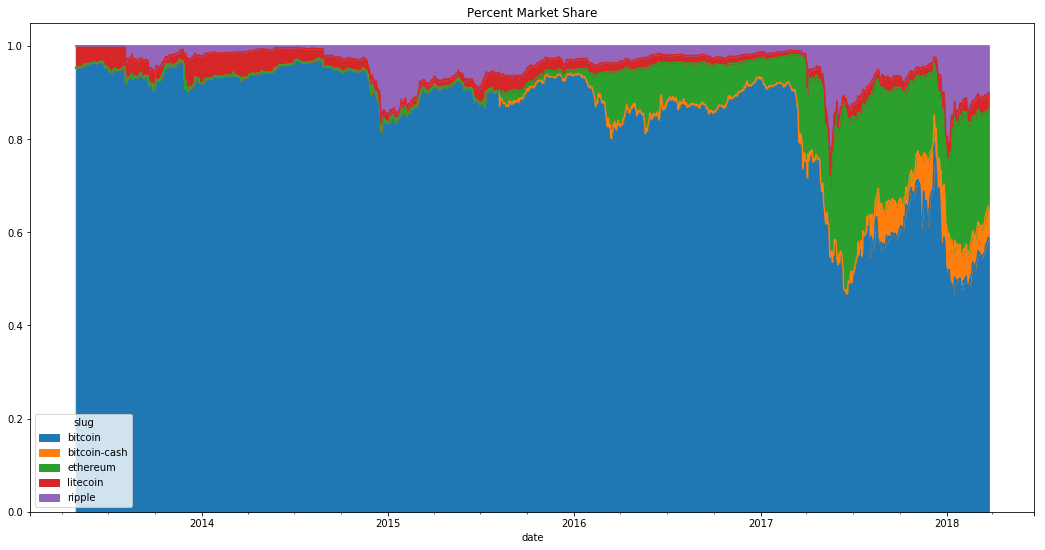

In [26]:
market_share.plot(kind='area', figsize=(18,9), title='Percent Market Share')

# Grouping by time
Use the **`resample`** method to easily group by time. Use [these aliases](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases) to choose the amount of time to group by.

In [ ]:
cc.resample('A')['market'].max()

In [ ]:
total_days = cc.resample('A')['market'].count()
total_days

In [ ]:
total_days.plot()

In [ ]:
total_days.plot(kind='bar')

# Seaborn works effortlessly with tidy data
Seaborn works with tidy data that has not been aggregated. Seaborn will do any aggregations for you without needing to use a `groupby`.

## Seaborn integration with pandas
All seaborn plotting functions contain a **`data`** parameter that accepts a pandas DataFrame. This allows you to use the string names of the DataFrame columns for the other arguments in the plotting functions.

## Axes vs Grid seaborn plots
All of seaborn plotting functions return either an 'axes' or a 'grid'. 

**axes** are simpler plots that contain a single panel (a single x and y axis). Most seaborn plotting functions return axes.

**grids** are more complex plots that contain multiple panels (many different plots) and are technically seaborn objects.

## Check the seaborn API
Open up the the [seaborn API](http://seaborn.pydata.org/api.html) to see all the plotting functions. 

The only functions that return a grid are:
* **`jointplot`**
* **`pairplot`**
* **`lmplot`**
* **`factorplot`**
* **`clutermap`**


In [27]:
import seaborn as sns

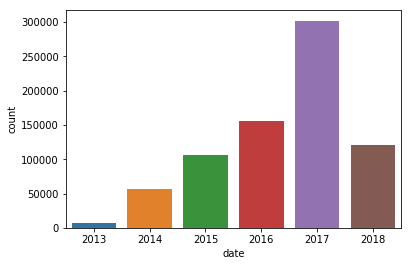

In [28]:
sns.countplot(x=cc.index.year)

In [29]:
flights = pd.read_csv('data/flights.csv').sample(frac=.1)

In [30]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
40667,2015,8,18,2,VX,923,N628VA,LAX,SFO,1635,1635.0,0.0,14.0,1649.0,70.0,71.0,52.0,337,1741.0,5.0,1745,1746.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
31783,2015,7,1,3,AA,28,N3LRAA,LAX,MIA,1215,1214.0,-1.0,20.0,1234.0,314.0,346.0,293.0,2342,2027.0,33.0,2029,2100.0,31.0,0,0,NaN,31.0,0.0,0.0,0.0,0.0
45008,2015,9,12,6,AA,327,N3FSAA,ORD,DCA,1146,1140.0,-6.0,16.0,1156.0,117.0,112.0,85.0,612,1421.0,11.0,1443,1432.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
22387,2015,5,12,2,DL,566,N938DN,ATL,MIA,859,929.0,30.0,12.0,941.0,111.0,115.0,95.0,594,1116.0,8.0,1050,1124.0,34.0,0,0,NaN,4.0,0.0,30.0,0.0,0.0
45296,2015,9,14,1,AA,2027,N538UW,PHX,MSP,1850,1849.0,-1.0,88.0,2017.0,186.0,243.0,151.0,1276,48.0,4.0,2356,52.0,56.0,0,0,NaN,56.0,0.0,0.0,0.0,0.0


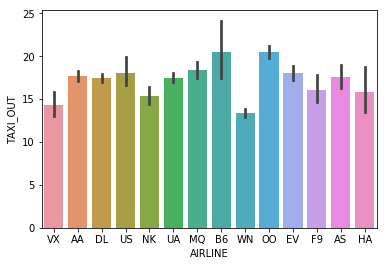

In [31]:
sns.barplot(x='AIRLINE', y='TAXI_OUT', data=flights)

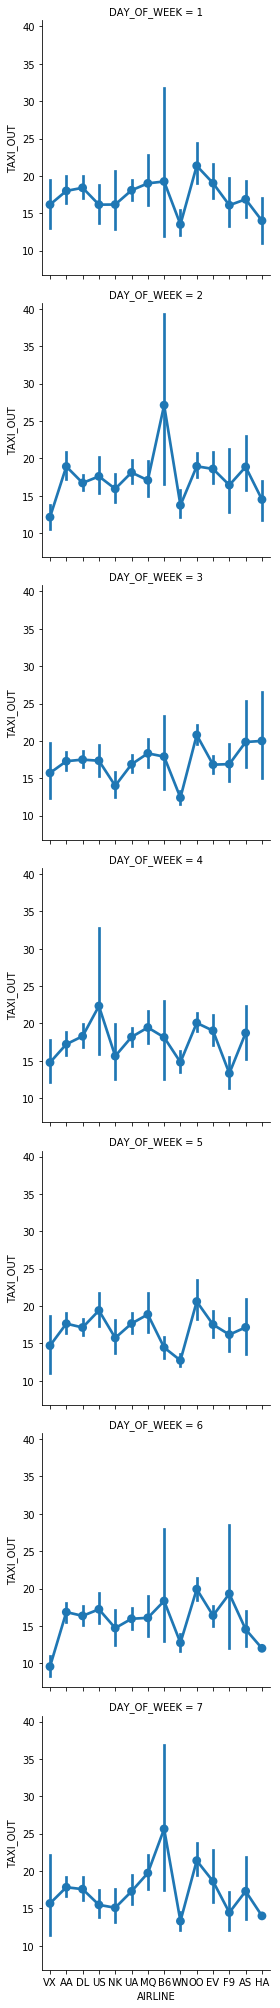

In [38]:
sns.factorplot(x='AIRLINE', y='TAXI_OUT', data=flights,row='DAY_OF_WEEK')

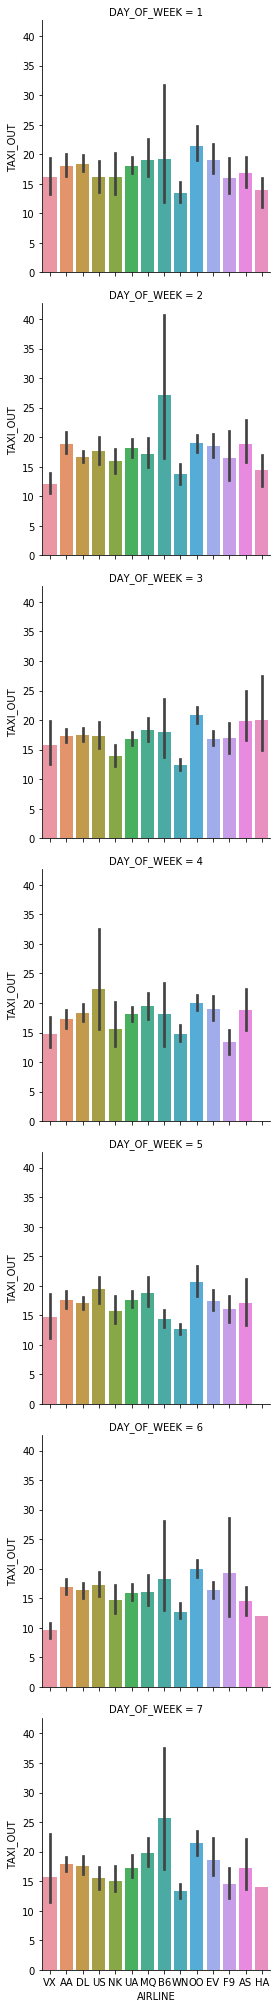

In [39]:
sns.factorplot(x='AIRLINE', y='TAXI_OUT', data=flights,row='DAY_OF_WEEK',kind='bar')

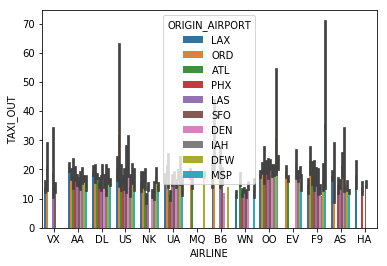

In [32]:
sns.barplot(x='AIRLINE', y='TAXI_OUT', data=flights,hue='ORIGIN_AIRPORT')

In [ ]:
sns.boxplot(x='AIRLINE', y='LATE_AIRCRAFT_DELAY', data=flights)

### Problem 1
<span  style="color:green; font-size:16px">Plot the maximum volume per week</span>

In [ ]:
# your code here

### Problem 2
<span  style="color:green; font-size:16px">Plot the number of unique coins per year</span>

In [ ]:
# your code here

### Problem 3
<span  style="color:green; font-size:16px">Use a **pointplot** in seaborn to plot between origin airport and arrival delay</span>

In [ ]:
# your code here

In [ ]:
sns.pointplot(x='ORIGIN_AIRPORT', y='ARRIVAL_DELAY', data=flights, ci=0)

# Solutions

### Problem 1
<span  style="color:green; font-size:16px">Plot the maximum volume per week</span>

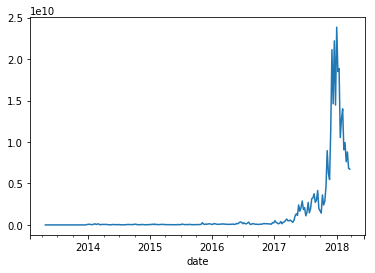

In [40]:
cc.resample('W')['volume'].max().plot()

### Problem 2
<span  style="color:green; font-size:16px">Plot the number of unique coins per year as a horizontal bar plot</span>

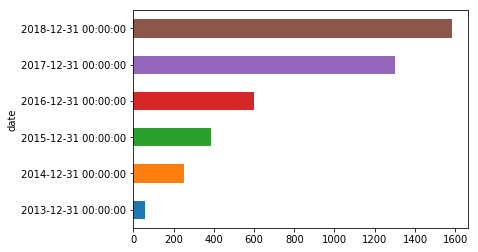

In [41]:
cc.resample('Y')['slug'].nunique().plot(kind='barh')

### Problem 3
<span  style="color:green; font-size:16px">Use a **pointplot** in seaborn to plot between origin airport and arrival delay</span>

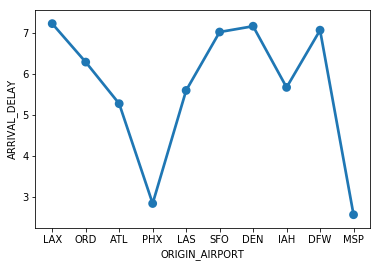

In [42]:
sns.pointplot(x='ORIGIN_AIRPORT', y='ARRIVAL_DELAY', data=flights, ci=0)